## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Information Source

In [19]:
def InformationSource(n=28):
    samples = [0, 50, 100, 150, 200, 250]
    weights = [1/2, 1/32, 1/8, 1/16, 1/32, 1/4]
    size = (n, n)
    return np.random.choice(samples, size=size, p=weights)

## Source Encoder

In [18]:
def SourceEncoder(img):
    arr = img.copy().flatten()
    ls = []
    for pixel in arr:
        if pixel == 0:
            ls += [0]
        elif pixel == 50:
            ls += [1, 0, 0, 0, 0]
        elif pixel == 100:
            ls += [1, 0, 1]
        elif pixel == 150:
            ls += [1, 0, 0, 1]
        elif pixel == 200:
            ls += [1, 0, 0, 0, 1]
        elif pixel == 250:
            ls += [1, 1]
    return ls

## Source Decoder

In [17]:
def SourceDecoder(bits, n=28):
    arr = []
    while(len(bits) > 0):
        if bits[0] == 0:
            arr.append(0)
            bits = bits[1:]
        elif bits[0:2] == [1, 1]:
            arr.append(250)
            bits = bits[2:]
        elif bits[0:3] == [1, 0, 1]:
            arr.append(100)
            bits = bits[3:]
        elif bits[0:4] == [1, 0, 0, 1]:
            arr.append(150)
            bits = bits[4:]
        elif bits[0:5] == [1, 0, 0, 0, 1]:
            arr.append(200)
            bits = bits[5:]
        elif bits[0:5] == [1, 0, 0, 0, 0]:
            arr.append(50)
            bits = bits[5:]
    
    arr = np.array(arr)
    arr = arr.reshape((n, n))
    return arr

## Check Functions

<Figure size 900x600 with 0 Axes>

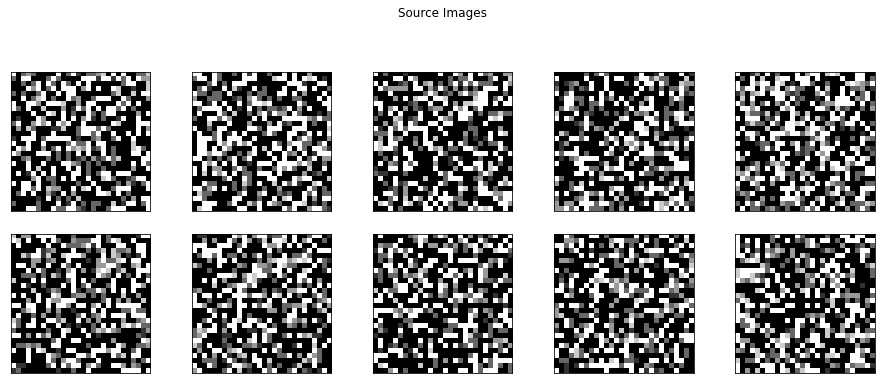

<Figure size 900x600 with 0 Axes>

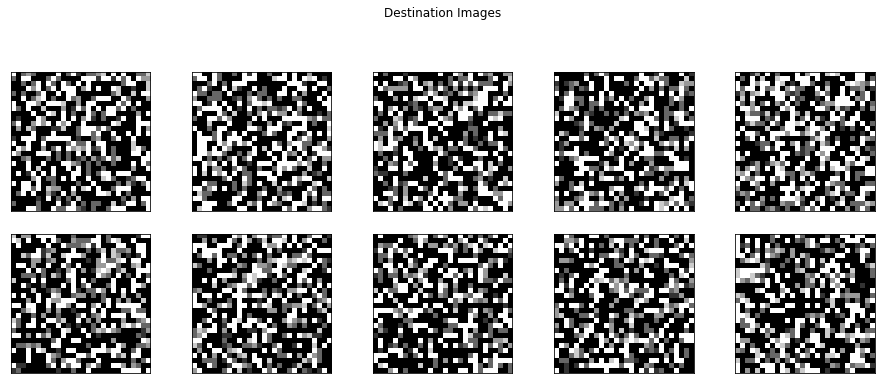

In [55]:
imgs = []
n = 10
# generate images
for i in range(n):
    imgs.append(InformationSource())
    
# coding
bits = []
for i in range(n):
    bits.append(SourceEncoder(imgs[i]))
    
# decoding
dec_imgs = []
for arr in bits:
    dec_imgs.append(SourceDecoder(arr))
    
def show_images(n, m, imgs, title='', name=''):
    
    if n*m != len(imgs):
        raise Exception("number of pictures and subfigs are not the same!")
    
    plt.figure(dpi=150)
    fig, axs = plt.subplots(n, m, figsize=(15, 15))
    
    for i in range(n):
        for j in range(m):
            axs[i, j].imshow(imgs[i*m+j], cmap='gray')
            axs[i, j].set_xticks([])
            axs[i, j].set_yticks([])
    
    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.4, 
                        wspace=0.3, 
                        hspace=0.0)
    plt.suptitle(title, y=0.45)
    plt.savefig(name)
    plt.show(block=True)
            
show_images(2, 5, imgs, 'Source Images', 'source_images.jpg')
show_images(2, 5, dec_imgs, 'Destination Images', 'destination_images.jpg')

## Average Length

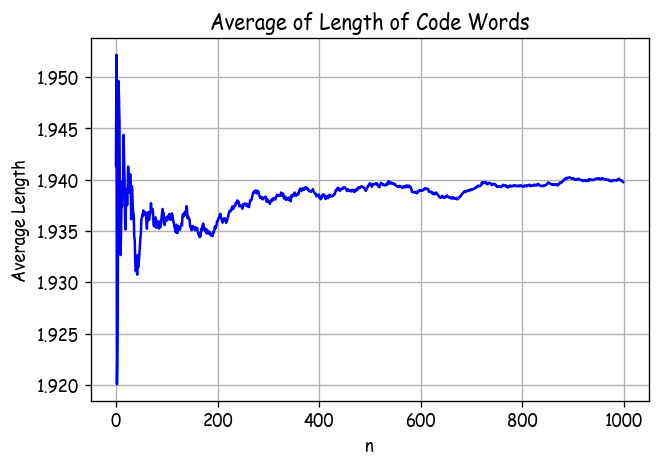

In [68]:
n = 1000
m = 28
imgs = []
L = []
L_avg = []

for i in range(n):
    imgs.append(InformationSource())

for i in range(n):
    if i == 0:
        L.append(len(SourceEncoder(imgs[i])))
    else:
        L.append(L[i-1]+len(SourceEncoder(imgs[i])))
        
for i in range(n):
    L_avg.append(L[i]/(m*m*(i+1)))
    
plt.rcParams["font.family"] = "cursive"
plt.figure(dpi=120)
plt.plot(L_avg, color='blue')
plt.grid()
plt.title("Average of Length of Code Words")
plt.xlabel("n")
plt.ylabel("Average Length")
plt.savefig("L_avg.jpg")
plt.show()